In [74]:
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_density, geom_histogram, labs, geom_boxplot, geom_bar
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('playlist_features.csv')

In [3]:
#Renaming playlists
df['Playlist'].replace('Kpop girl group songs that were a cultural reset', 'Kpop-iconic', inplace=True)
df['Playlist'].replace('KPOP', 'Kpop-myselection', inplace=True)
df['Playlist'].replace('lit anime music', 'Anime-myselection', inplace=True)
df['Playlist'].replace(r'Shounen Anime Vibes (Anime Opening & Ending)', 'Anime-iconic', inplace=True)

df['Preference'] = np.where(df['Playlist'].str.contains('iconic'), 'Other', 'Mine')
df['Type'] = np.where(df['Playlist'].str.contains('Kpop'), 'Kpop', 'Anime')

In [14]:
print("Null values:", df.isna().sum().sum())
df = df[df['Playlist'].str.contains('Kpop')]
print("Data dimensions: ", df.shape)
df.head()

Null values: 0
Data dimensions:  (334, 24)


,Track Name,Track ID,Artist,Playlist,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Preference,Type
0,Into the New World,24Gy6lVtCd8nOL2vzZiFyV,Girls' Generation,Kpop-iconic,0.699,0.908,7,-2.108,1,0.0334,...,108.023,audio_features,24Gy6lVtCd8nOL2vzZiFyV,spotify:track:24Gy6lVtCd8nOL2vzZiFyV,https://api.spotify.com/v1/tracks/24Gy6lVtCd8n...,https://api.spotify.com/v1/audio-analysis/24Gy...,267320,4,Other,Kpop
1,HELICOPTER,2hJS7BdEaH9Jo8MeJujsHT,CLC,Kpop-myselection,0.699,0.908,7,-2.108,1,0.0334,...,108.023,audio_features,24Gy6lVtCd8nOL2vzZiFyV,spotify:track:24Gy6lVtCd8nOL2vzZiFyV,https://api.spotify.com/v1/tracks/24Gy6lVtCd8n...,https://api.spotify.com/v1/audio-analysis/24Gy...,267320,4,Mine,Kpop
4,Tell Me,62x5q8OrmPpmlA8PpjrQt3,Wonder Girls,Kpop-iconic,0.814,0.930,6,-5.128,0,0.0364,...,127.002,audio_features,62x5q8OrmPpmlA8PpjrQt3,spotify:track:62x5q8OrmPpmlA8PpjrQt3,https://api.spotify.com/v1/tracks/62x5q8OrmPpm...,https://api.spotify.com/v1/audio-analysis/62x5...,219453,4,Other,Kpop
5,HANN (Alone),7gr57cYekMWriyJYbT7oZ4,(G)I-DLE,Kpop-myselection,0.814,0.930,6,-5.128,0,0.0364,...,127.002,audio_features,62x5q8OrmPpmlA8PpjrQt3,spotify:track:62x5q8OrmPpmlA8PpjrQt3,https://api.spotify.com/v1/tracks/62x5q8OrmPpm...,https://api.spotify.com/v1/audio-analysis/62x5...,219453,4,Mine,Kpop
8,One More Time,1oD1B653Nje6Z0zoijB56I,Jewelry,Kpop-iconic,0.754,0.866,11,-4.286,0,0.0344,...,132.005,audio_features,1oD1B653Nje6Z0zoijB56I,spotify:track:1oD1B653Nje6Z0zoijB56I,https://api.spotify.com/v1/tracks/1oD1B653Nje6...,https://api.spotify.com/v1/audio-analysis/1oD1...,214533,4,Other,Kpop


In [15]:
#Results summary
print("Number of KPOP songs - my playlist: ", len(df[df['Playlist']=='Kpop-myselection']))
print("Number of KPOP songs - iconic playlist: ", len(df[df['Playlist']=='Kpop-iconic']))

Number of KPOP songs - my playlist:  60
Number of KPOP songs - iconic playlist:  274


In [16]:
#Most popular kpop artists in my playlist:
Counter(df[df['Playlist']=='Kpop-myselection']['Artist']).most_common(10)

[('(G)I-DLE', 8),
 ('MAMAMOO', 8),
 ('Dreamcatcher', 7),
 ('OH MY GIRL', 6),
 ('CLC', 5),
 ('AOA', 5),
 ('BLACKPINK', 5),
 ('SUNMI', 3),
 ('Lovelyz', 2),
 ('Hwa Sa', 1)]

In [17]:
#Shared kpop songs among playlists
set(df[df['Playlist']=='Kpop-iconic']['Track Name']).intersection(set(df[df['Playlist']=='Kpop-myselection']['Track Name']))

{'Ah-Choo',
 'Alone',
 "As If It's Your Last",
 'BBoom BBoom',
 'BLACK DRESS',
 'BOCA',
 'BOOMBAYAH',
 'Crazy',
 'DDU-DU DDU-DU',
 'Destiny',
 'Dolphin',
 'Dun Dun Dance',
 'Décalcomanie',
 'FIESTA',
 'GOOD NIGHT',
 'Gashina',
 'HELICOPTER',
 'HIP',
 'Heart Attack',
 'Hobgoblin',
 'How You Like That',
 'LATATA',
 'LION',
 'LUV',
 'Like a Cat',
 'MAGO',
 'Maria',
 'Miniskirt',
 'NUNU NANA',
 'Oh my god',
 'Secret Garden',
 'Starry Night'}

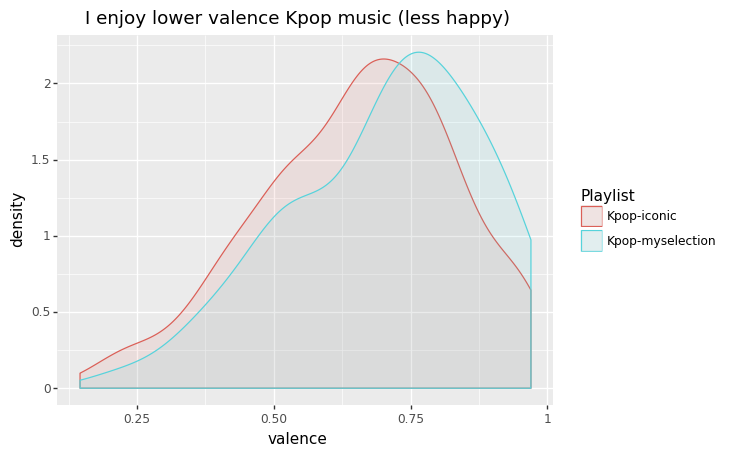

<ggplot: (-9223371918971448328)>

In [21]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='valence', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I enjoy lower valence Kpop music (less happy)")
)

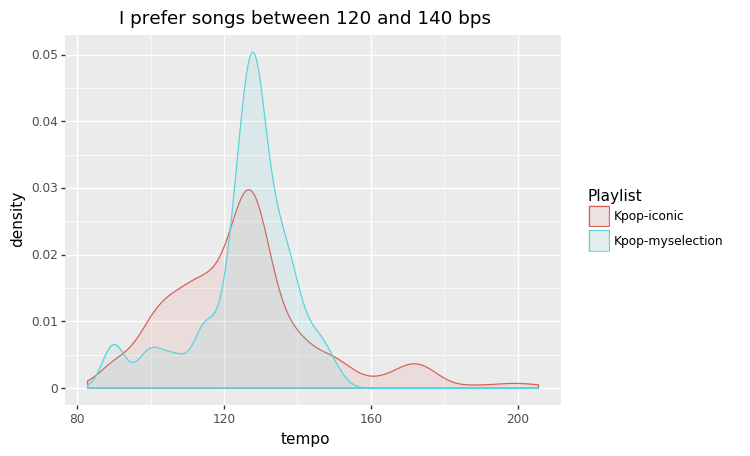

<ggplot: (-9223371918970937860)>

In [29]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='tempo', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I prefer songs between 120 and 140 bps")
)

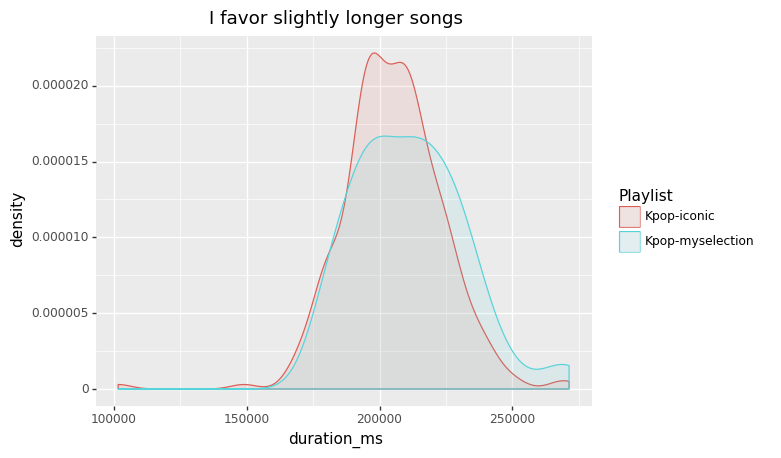

<ggplot: (-9223371918970611716)>

In [30]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='duration_ms', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I favor slightly longer songs")
)

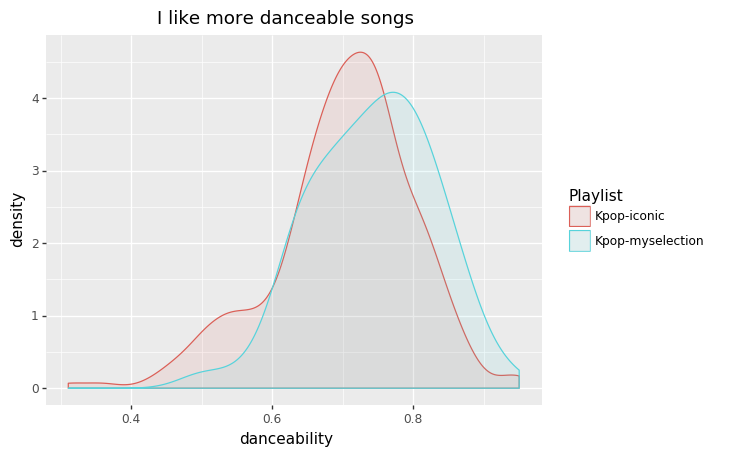

<ggplot: (-9223371918970199404)>

In [40]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='danceability', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="I like more danceable songs")
)

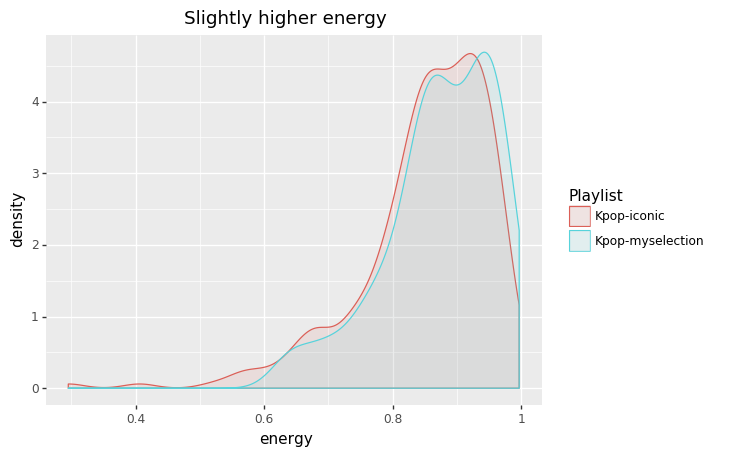

<ggplot: (-9223371918970164080)>

In [42]:
(
    ggplot(df[df['Type']=='Kpop'], aes(x='energy', color='Playlist', fill='Playlist'))
    + geom_density(alpha=0.1) + labs(title="Slightly higher energy")
)

In [58]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [60]:
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

In [62]:
t_tests = []
for feature in features:
    result = ttest_ind(df[df['Playlist'].str.contains('iconic')][feature], df[df['Playlist'].str.contains('my')][feature])[1]
    print(feature, result)
    t_tests.append(result)

danceability 0.00385367855456019
energy 0.107961509797273
key 0.08594443897134652
loudness 0.6391265379864766
speechiness 0.07583791696424348
acousticness 0.12461275628851612
instrumentalness 0.0818319370432517
liveness 0.5057998489328368
valence 0.05072159000583634
tempo 0.9035805415585645
duration_ms 0.02284000924075295


In [73]:
#apply Bonferroni correction
multipletests(t_tests, method='hs')

(array([ True, False, False, False, False, False, False, False, False,
        False, False]),
 array([0.04158304, 0.46790991, 0.46790991, 0.87929962, 0.46790991,
        0.46790991, 0.46790991, 0.87929962, 0.37404598, 0.90358054,
        0.20629929]),
 0.004652171732197341,
 0.004545454545454546)

In [ ]:
#According to classical statistics, the statistically significant difference between my playlist and an iconic kpop playlist is danceability